In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def compute_angles(w):
    w = w/np.linalg.norm(w, axis=-1, keepdims=True)
    gram = w.dot(w.T)
    gram_off_diag = gram[np.tri(gram.shape[0], k=-1, dtype=bool)]
    return np.arccos(abs(gram_off_diag))/np.pi*180

def gram(w):
    w = w/np.linalg.norm(w, axis=-1, keepdims=True)
    return w.dot(w.T)

('old', 59.172360300854201)
('new', 70.390192035873326)


(0, 90)

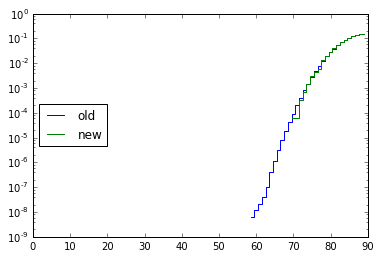

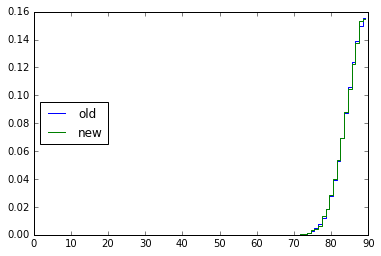

In [71]:
n_mixtures = 128
OC = 2
n_sources = OC * n_mixtures
multiplier = 100

w = np.random.randn(multiplier * n_sources, n_mixtures)
g = gram(w)
g = g - np.eye(g.shape[0])
g_max = g.max(axis=1)
g_sort = np.argsort(g_max)
wp = w[g_sort[:n_sources]]

angles = compute_angles(w)
vals, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('old', angles.min())

anglesp = compute_angles(wp)
valsp, binsp = np.histogram(anglesp, bins=np.arange(0, 91), density=True)
print('new', anglesp.min())

plt.figure()
plt.semilogy(bins[:-1], vals, drawstyle='steps-mid', label='old')
plt.semilogy(bins[:-1], valsp, drawstyle='steps-mid', label='new')
plt.legend(loc='center left')
plt.xlim([0, 90])

plt.figure()
plt.plot(bins[:-1], vals, drawstyle='steps-mid', label='old')
plt.plot(bins[:-1], valsp, drawstyle='steps-mid', label='new')
plt.legend(loc='center left')
plt.xlim([0, 90])

/home/jesse/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(0, 90)

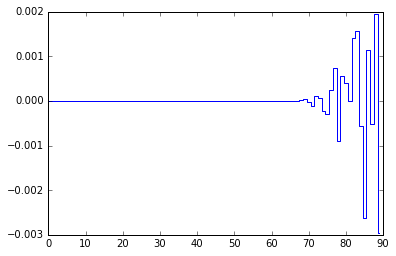

In [43]:
plt.figure()
plt.plot(bins[:-1], valsp-vals, drawstyle='steps-mid')
plt.legend(loc='center left')
plt.xlim([0, 90])

In [ ]:
plt.figure()
for ii in range(7):
    for jj in range(200):
        g_max = g.max(axis=1)
        arg_max = np.argmax(g_max)
        w = np.delete(w, arg_max, axis=0)
        g = np.delete(g, arg_max, axis=0)
        g = np.delete(g, arg_max, axis=1)
    angles = compute_angles(w)
    print(angles.min())
    vals, bins = np.histogram(angles, bins=np.arange(0, 91))
    hists.append(vals)

(0, 90)

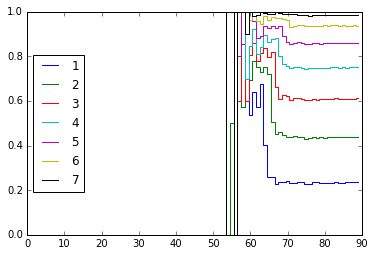

In [42]:
for ii in range(len(hists)-1):
    plt.plot(bins[:-1], (hists[0]-hists[ii+1])/(hists[0]+1e-3), drawstyle='steps-mid', label=str(ii+1))
#plt.yscale('log')
plt.legend(loc='center left')
plt.xlim([0, 90])

(0, 90)

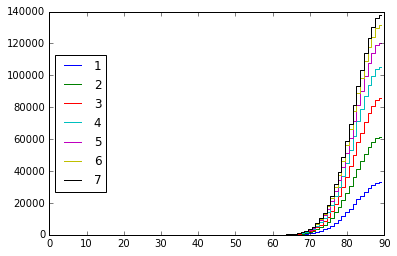

In [45]:
for ii in range(len(hists)-1):
    plt.plot(bins[:-1], (hists[ii]-hists[ii+1]), drawstyle='steps-mid', label=str(ii+1))
#plt.yscale('log')
plt.legend(loc='center left')
plt.xlim([0, 90])

# Coherence Cost

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from analysis import evaluate_dgcs
from optimizers.ica_optimizers import sgd, momentum, adam

Using gpu device 0: Tesla K40c (CNMeM is enabled with initial size: 20.0% of memory, cuDNN 4007)


In [2]:
def compute_angles(w):
    w = w/np.linalg.norm(w, axis=-1, keepdims=True)
    gram = w.dot(w.T)
    gram_off_diag = gram[np.tri(gram.shape[0], k=-1, dtype=bool)]
    return np.arccos(abs(gram_off_diag))/np.pi*180

def gram(w):
    w = w/np.linalg.norm(w, axis=-1, keepdims=True)
    return w.dot(w.T)

In [3]:
kwargs = {'optimizer': 'sgd',
          'learning_rule': sgd}
n_sources = 256
n_mixtures = 128

In [4]:
kwargs['optimizer'] = 'sgd'
kwargs['learning_rule'] = sgd
w, w0 = evaluate_dgcs(['random'], ['COHERENCE'],
                      n_sources=n_sources, n_mixtures=n_mixtures, **kwargs)
w = np.squeeze(w)
w0 = np.squeeze(w0)

kwargs['optimizer'] = 'L-BFGS-B'
kwargs['learning_rule'] = None
wb = np.squeeze(evaluate_dgcs(['random'], ['COHERENCE'],
                              n_sources=n_sources, n_mixtures=n_mixtures, **kwargs)[0])

w4, _ = evaluate_dgcs(['random'], ['L4'],
                      n_sources=n_sources, n_mixtures=n_mixtures)
w4 = np.squeeze(w4)

Random seed: 6401
Overcomplete ICA
Degeneracy control: COHERENCE
ICA with SGD done!499999
Final loss value: 0.0793569907546
Random seed: 70837
Overcomplete ICA
Degeneracy control: COHERENCE
ICA with L-BFGS-B done!
Final loss value: 0.224301949143
Random seed: 71489
Overcomplete ICA
Degeneracy control: L4
ICA with L-BFGS-B done!
Final loss value: 0.273872375488


('coherence sgd', 85.440659293511359)
('coherence bfgs', 77.038164981660401)
('L4 bfgs', 85.228857336903744)
('original', 66.207992862913272)
('coherence sgd', 85.440659293511359)
('coherence bfgs', 77.038164981660401)
('L4 bfgs', 85.228857336903744)
('original', 66.207992862913272)


(65, 90)

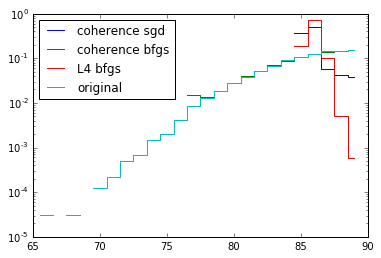

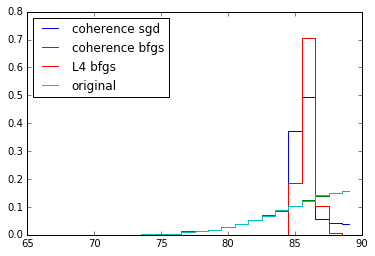

In [6]:
plt.figure()

angles = compute_angles(w)
vals1, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('coherence sgd', angles.min())
plt.semilogy(bins[:-1], vals1, drawstyle='steps-mid', label='coherence sgd')

angles = compute_angles(wb)
vals2, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('coherence bfgs', angles.min())
plt.semilogy(bins[:-1], vals2, drawstyle='steps-mid', label='coherence bfgs')

angles = compute_angles(w4)
vals4, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('L4 bfgs', angles.min())
plt.semilogy(bins[:-1], vals4, drawstyle='steps-mid', label='L4 bfgs')

angles = compute_angles(w0)
vals3, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('original', angles.min())
plt.semilogy(bins[:-1], vals3, drawstyle='steps-mid', label='original')

plt.legend(loc='upper left')
plt.xlim([65, 90])

plt.savefig('no_data_coherence.pdf')

plt.figure()

angles = compute_angles(w)
vals1, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('coherence sgd', angles.min())
plt.plot(bins[:-1], vals1, drawstyle='steps-mid', label='coherence sgd')

angles = compute_angles(wb)
vals2, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('coherence bfgs', angles.min())
plt.plot(bins[:-1], vals2, drawstyle='steps-mid', label='coherence bfgs')

angles = compute_angles(w4)
vals4, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('L4 bfgs', angles.min())
plt.plot(bins[:-1], vals4, drawstyle='steps-mid', label='L4 bfgs')

angles = compute_angles(w0)
vals3, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('original', angles.min())
plt.plot(bins[:-1], vals3, drawstyle='steps-mid', label='original')

plt.legend(loc='upper left')
plt.xlim([65, 90])